### Diffrences between self ratings and date ratings 

In [1]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
raw = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [10]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

data = raw.drop(columns=dropping)

In [11]:
self_ratings = ["attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]

activities = ["sports", "tvsports", "exercise", "dining", "museums","art", "hiking", 
              "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", 
              "shopping", "yoga"]

ratings_of_partner = ["attr", "sinc", "intel", "fun", "amb", "shar", "like", "prob", "met"]
ratings_from_partner = ["attr_o", "intel_o", "fun_o", "amb_o","shar_o", 
                        "like_o", "prob_o", "met_o"]

importance = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
partners_importance = ["pf_o_attr", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb","pf_o_shar"]

In [46]:
people = dict()
matches = dict()

n = len(data)
match_matrix = np.zeros((n,n))

for index, row in data.iterrows():
    iid = int(row["iid"])
    if iid in people:
        continue
    people[iid] = row[self_ratings]

In [47]:
people = pd.DataFrame.from_dict(people).T

In [48]:
real = dict()

for index, row in data.iterrows():
    iid = int(row["iid"])
    x = row[["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o"]].astype(float)
    if iid not in real:
        real[iid] = np.array(x.values)
    else:
        real[iid] = np.vstack((real[iid], x.values))

In [49]:
averages = dict()
for i in real:
    av = np.nanmean(real[i], axis=0)
    averages[i] = av

In [50]:
averages = pd.DataFrame.from_dict(averages).T

In [51]:
people["real_attr"] = averages[0]
people["real_sinc"] = averages[1]
people["real_intel"] = averages[2]
people["real_fun"] = averages[3]
people["real_amb"] = averages[4]

In [52]:
people["attr_diff"] = people["attr3_1"] - people["real_attr"]
people["sinc_diff"] = people["sinc3_1"] - people["real_sinc"]
people["intel_diff"] = people["intel3_1"] - people["real_intel"]
people["fun_diff"] = people["fun3_1"] - people["real_fun"]
people["amb_diff"] = people["amb3_1"] - people["real_amb"]

In [59]:
people = people.dropna()

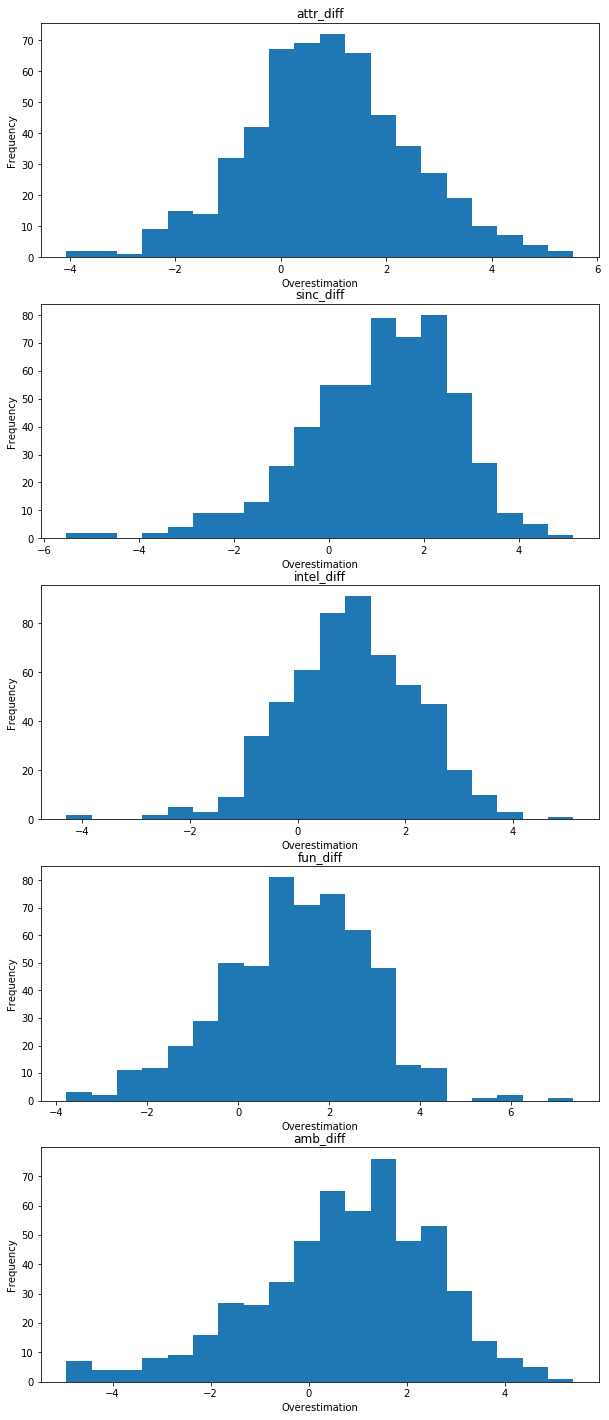

In [64]:
plt.figure(figsize=(10, 25))
labels = ["attr_diff", "sinc_diff", "intel_diff", "fun_diff", "amb_diff"]
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.hist(people[labels[i]].values.astype(np.float64), bins=20)
    plt.ylabel("Frequency")
    plt.xlabel("Overestimation")
    plt.title(labels[i])
plt.show()

In [61]:
people[labels].values.astype(np.float64).mean(axis=0)

array([0.89806022, 1.06741549, 0.98790808, 1.26951799, 0.75705166])

Text(0.5,1,'attr_diff')

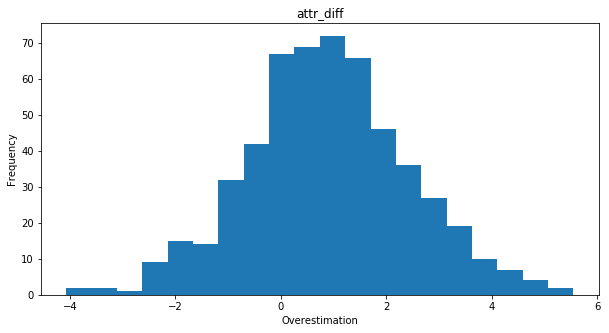

In [70]:
plt.figure(figsize=(10, 5))
plt.hist(people[labels[0]].values.astype(np.float64), bins=20)
plt.ylabel("Frequency")
plt.xlabel("Overestimation")
plt.title(labels[0])

In [69]:
labels[0]

'attr_diff'